In [2173]:
import pygad
import numpy as np
import matplotlib.pyplot as plt

In [2174]:
n = 30
length = 1000
half_height = 10
ds = length/n
E = 2e3
I = 1
F = -5
wall_penalty_coeff = 1e1
support_penalty_coeff = 1e0

In [2175]:
def fitness_func(ga_instance, solution, solution_idx):
    theta = np.atan2(np.diff(solution), ds)
    energy = np.sum(E*I*(np.diff(theta)/ds)**2) + np.sum(F*(1-np.cos(theta)))
    penalty = wall_penalty_coeff*np.sum(np.maximum(0, solution**2-half_height**2)) + support_penalty_coeff*(solution[0]**2 + solution[-1]**2)
    fitness = 1.0 / (energy+penalty)
    return fitness

In [2176]:
fitness_function = fitness_func

num_generations = 1000
num_parents_mating = 2

sol_per_pop = int(1e5)
num_genes = n

init_range_low = -half_height
init_range_high = half_height

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [2177]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

In [ ]:
ga_instance.run()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()

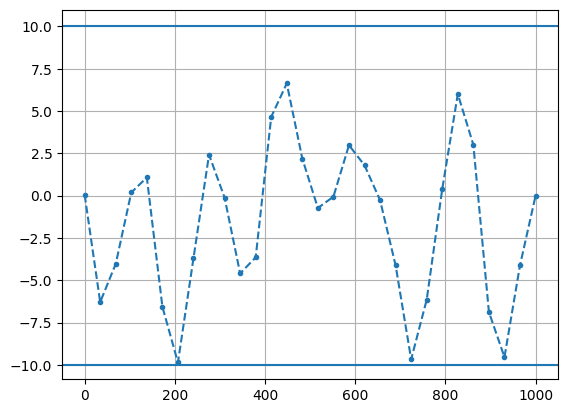

In [ ]:
plt.plot(np.linspace(0, length, n), solution, marker = ".", linestyle="--")
plt.axhline(half_height)
plt.axhline(-half_height)
# plt.axis("equal")
plt.grid()